C:\Users\A\AppData\Local\Temp\ipykernel_5724\1503044820.py:65: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)  # Set x-axis range to 0-100%


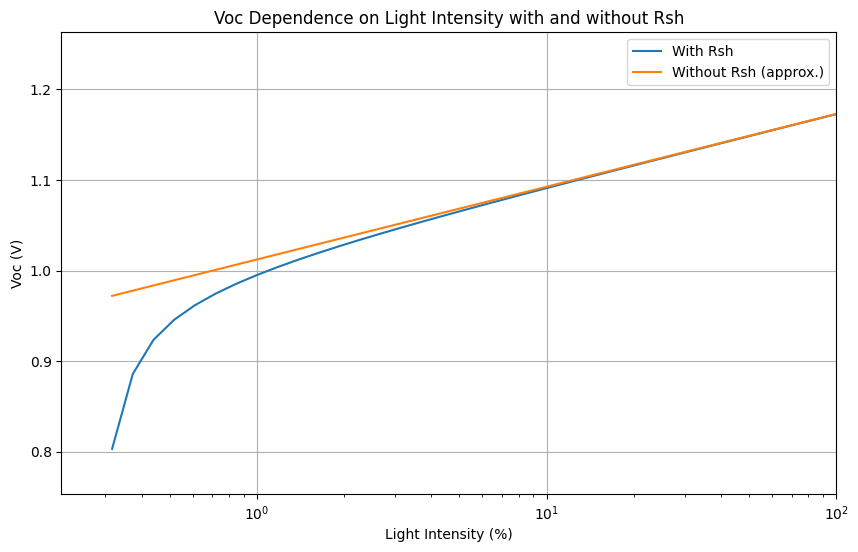

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.constants import e, k

Jph_ref = 25.6e-3  # Photogenerated current density under reference illumination (A/cm²)
J0 = 6.48e-17  # Saturation current density (A/cm²)
Rsh = 1e4  # Shunt resistance (Ω·cm²)
n = 1.35  # Ideality factor

T = 300  # Temperature (K)
kT_q = k * T / e  # Value of kT/q, approximately 0.02585 V

relative_light_intensities = np.logspace(-2.5, 1, 50)
# Jph values at different light intensities
Jph_values = Jph_ref * relative_light_intensities


# Function to calculate Voc (considering Rsh)
def calculate_Voc_with_Rsh(Jph, J0, Rsh, n, kT_q):

    def equation_to_solve(Voc):
        return J0 * (np.exp(Voc / (n * kT_q)) - 1) + Voc / Rsh - Jph

    # Initial guess, can be adjusted based on experience
    Voc_initial_guess = n * kT_q * np.log(Jph / J0 + 1)
    Voc_solution = fsolve(equation_to_solve, Voc_initial_guess)[0]
    return Voc_solution


# Function to calculate Voc (ignoring Rsh) - approximate formula
def calculate_Voc_no_Rsh_approx(Jph, J0, n, kT_q):
    Voc = n * kT_q * np.log(Jph / J0 + 1)  # More accurate approximation
    # Voc = n * kT_q * np.log(Jph / J0)  # Simpler approximation, when Jph/J0 >> 1
    return Voc


# Store Voc values
Voc_values_with_Rsh = []
Voc_values_no_Rsh = []

for Jph in Jph_values:
    Voc_with_Rsh = calculate_Voc_with_Rsh(Jph, J0, Rsh, n, kT_q)
    Voc_values_with_Rsh.append(Voc_with_Rsh)

    Voc_no_Rsh = calculate_Voc_no_Rsh_approx(Jph, J0, n, kT_q)
    Voc_values_no_Rsh.append(Voc_no_Rsh)

# Plotting the Voc curves
plt.figure(figsize=(10, 6))
# Relative light intensity multiplied by 100 to display as percentage
plt.plot(relative_light_intensities * 100,
         Voc_values_with_Rsh,
         label='With Rsh')
plt.plot(relative_light_intensities * 100,
         Voc_values_no_Rsh,
         label='Without Rsh (approx.)')

plt.xlabel('Light Intensity (%)')
plt.ylabel('Voc (V)')
plt.title('Voc Dependence on Light Intensity with and without Rsh')
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.xlim(0, 100)  # Set x-axis range to 0-100%
plt.ylim(min(Voc_values_with_Rsh) - 0.05,
         max(Voc_values_with_Rsh) + 0.01)  # y-axis range, slightly expanded
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_5724\1882123958.py:13: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)


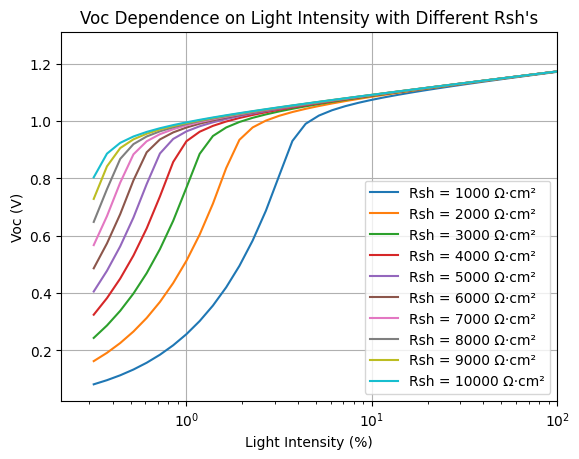

In [8]:
for Rsh_value in np.linspace(1e3, 1e4, 10):
    plt.plot(relative_light_intensities * 100, [
        calculate_Voc_with_Rsh(Jph, J0, Rsh_value, n, kT_q)
        for Jph in Jph_values
    ],
             label=f'Rsh = {Rsh_value:.0f} Ω·cm²')
plt.xlabel('Light Intensity (%)')
plt.ylabel('Voc (V)')
plt.title("Voc Dependence on Light Intensity with Different Rsh's")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.show()